Завдання 1

Створіть клас, який описує автомобіль. Які атрибути та методи мають бути повністю інкапсульовані? Доступ до таких атрибутів та зміну даних реалізуйте через спеціальні методи (get, set).

In [2]:
class Automobile:
    def __init__(self, brand: str, model: str, year: int, vin_number: str):
        self.brand = brand  # Публічний атрибут
        self.model = model  # Публічний атрибут
        self.year = year    # Публічний атрибут

        # Захищений атрибут для швидкості
        self._speed = 0

        # Приватний атрибут для VIN-номера (незмінний)
        self.__vin_number = vin_number

    # "Getter" для отримання швидкості
    def get_speed(self) -> int:
        return self._speed

    # "Setter" для встановлення швидкості з перевіркою
    def set_speed(self, new_speed: int):
        if new_speed < 0:
            print("Помилка: Швидкість не може бути від'ємною.")
        elif new_speed > 250:
            print("Помилка: Максимальна швидкість 250 км/год.")
        else:
            self._speed = new_speed
            print(f"Швидкість встановлено на {self._speed} км/год.")

    # "Getter" для отримання VIN-номера (без сеттера, бо він незмінний)
    def get_vin_number(self) -> str:
        return self.__vin_number

    def accelerate(self, amount: int):
        """Збільшує швидкість на задане значення."""
        new_speed = self._speed + amount
        self.set_speed(new_speed)

    def brake(self, amount: int):
        """Зменшує швидкість на задане значення."""
        new_speed = self._speed - amount
        self.set_speed(new_speed)

my_car = Automobile("Toyota", "Camry", 2023, "JN1AZ000XYZ123456")

# Доступ до публічних атрибутів
print(f"Мій автомобіль: {my_car.brand} {my_car.model}")

# Робота через методи get/set
my_car.set_speed(60)
print(f"Поточна швидкість: {my_car.get_speed()} км/год")
my_car.accelerate(20)
my_car.brake(30)

# Спроба встановити некоректну швидкість
my_car.set_speed(-10)

# Отримання "приватного" VIN-номера через геттер
print(f"VIN-номер: {my_car.get_vin_number()}")

# Спроба прямого доступу до приватного атрибута викличе помилку
try:
    print(my_car.__vin_number)
except AttributeError as e:
    print(f"Не вдалося отримати доступ до __vin_number: {e}")

Мій автомобіль: Toyota Camry
Швидкість встановлено на 60 км/год.
Поточна швидкість: 60 км/год
Швидкість встановлено на 80 км/год.
Швидкість встановлено на 50 км/год.
Помилка: Швидкість не може бути від'ємною.
VIN-номер: JN1AZ000XYZ123456
Не вдалося отримати доступ до __vin_number: 'Automobile' object has no attribute '__vin_number'


Завдання 2

Створіть 2 класи мови, наприклад, англійська та іспанська. В обох класів має бути метод greeting(). Обидва створюють різні привітання. Створіть два відповідні об'єкти з двох класів вище та викличте дії цих двох об'єктів в одній функції (функція hello_friend).

In [3]:
class English:
    def greeting(self) -> str:
        return "Hello!"

class Spanish:
    def greeting(self) -> str:
        return "¡Hola!"

def hello_friend(language_object):
    """Приймає об'єкт мови та виводить його привітання."""
    print(f"A friend from a foreign country says: {language_object.greeting()}")

# Створюємо об'єкти
english_speaker = English()
spanish_speaker = Spanish()

# Викликаємо одну й ту саму функцію з різними об'єктами
hello_friend(english_speaker)
hello_friend(spanish_speaker)

A friend from a foreign country says: Hello!
A friend from a foreign country says: ¡Hola!


Завдання 3

Використовуючи посилання наприкінці цього уроку, ознайомтеся з таким засобом інкапсуляції, як властивості. Ознайомтеся з декоратором property у Python. Створіть клас, що описує температуру і дозволяє задавати та отримувати температуру за шкалою Цельсія та Фаренгейта, причому дані можуть бути задані в одній шкалі, а отримані в іншій.

In [4]:
class Temperature:
    def __init__(self, celsius: float = 0):
        # Внутрішній атрибут для зберігання температури завжди в Цельсіях
        self._celsius = float(celsius)

    @property
    def celsius(self) -> float:
        """Властивість для отримання температури в Цельсіях."""
        print("(отримання температури в °C)")
        return self._celsius

    @celsius.setter
    def celsius(self, value: float):
        """Властивість для встановлення температури в Цельсіях."""
        print(f"(встановлення температури {value}°C)")
        self._celsius = float(value)

    @property
    def fahrenheit(self) -> float:
        """Властивість, що обчислює та повертає температуру в Фаренгейтах."""
        print("(обчислення та отримання температури в °F)")
        return (self._celsius * 9/5) + 32

    @fahrenheit.setter
    def fahrenheit(self, value: float):
        """Властивість, що приймає Фаренгейти, конвертує їх у Цельсії та зберігає."""
        print(f"(встановлення температури {value}°F, конвертація в °C)")
        self._celsius = (float(value) - 32) * 5/9

temp = Temperature()

# Встановлюємо температуру в Цельсіях, а отримуємо в Фаренгейтах
print("Крок 1: Встановлюємо в Цельсіях")
temp.celsius = 25
print(f"Температура в Цельсіях: {temp.celsius}°C")
print(f"Температура в Фаренгейтах: {temp.fahrenheit}°F")

print("\nКрок 2: Встановлюємо в Фаренгейтах")
# Встановлюємо в Фаренгейтах, а отримуємо в обох шкалах
temp.fahrenheit = 212
print(f"Температура в Фаренгейтах: {temp.fahrenheit}°F")
print(f"Температура в Цельсіях: {temp.celsius}°C")

Крок 1: Встановлюємо в Цельсіях
(встановлення температури 25°C)
(отримання температури в °C)
Температура в Цельсіях: 25.0°C
(обчислення та отримання температури в °F)
Температура в Фаренгейтах: 77.0°F

Крок 2: Встановлюємо в Фаренгейтах
(встановлення температури 212°F, конвертація в °C)
(обчислення та отримання температури в °F)
Температура в Фаренгейтах: 212.0°F
(отримання температури в °C)
Температура в Цельсіях: 100.0°C


Завдання 4

Опишіть два класи Base та його спадкоємця Child з методами method(), який виводить на консоль фрази відповідно "Hello from Base" та "Hello from Child", using classmethod (@classmethod) decorator.

In [5]:
class Base:
    @classmethod
    def method(cls):
        # cls - це посилання на клас Base
        print(f"Hello from {cls.__name__}")

class Child(Base):
    @classmethod
    def method(cls):
        # cls - це посилання на клас Child
        print(f"Hello from {cls.__name__}")

# Виклик методу безпосередньо від класів
Base.method()
Child.method()

# Можна викликати і від екземпляра, але він все одно працюватиме з класом
print("\nВиклик від екземплярів:")
base_instance = Base()
child_instance = Child()
base_instance.method()
child_instance.method()

Hello from Base
Hello from Child

Виклик від екземплярів:
Hello from Base
Hello from Child


Завдання 5

Ознайомившись з кодом файлу example_7.py, створіть додаткові класи-нащадки Cone та Paraboloid від класу Shape. Перевизначте їх методи. Створіть екземпляри відповідних класів за скористайтеся всіма методами. В результаті повинно з’явитися зображення. Перегляньте їх.



In [ ]:
# Потрібно встановити: pip install Pillow
from PIL import Image, ImageDraw


class Shape:
    def __init__(self):
        # Колір тла
        self.back_color = (155, 213, 117, 100)
        # Створюємо зображення 500 * 500
        self.im = Image.new('RGBA', (500, 500), self.back_color)
        self.draw1 = ImageDraw.Draw(self.im)

    def draw(self):
        pass

    def erase(self):
        self.im = Image.new('RGBA', (500, 500), self.back_color)
        self.draw1 = ImageDraw.Draw(self.im)

    def save(self):
        print("Background was created")
        return self.im.save('picture.png', quality=95)


class Circle(Shape):
    def draw(self):
        self.draw1.ellipse((75, 100, 175, 200), fill='yellow', outline=(255, 255, 255))

    def erase(self):
        self.draw1.ellipse((75, 100, 175, 200), fill=self.back_color)

    def save(self):
        print("Image with circle was created")
        return self.im.save('draw-circle.png', quality=95)


class Square(Shape):
    def draw(self):
        self.draw1.rectangle((200, 100, 300, 200), fill='blue', outline=(255, 255, 255))

    def erase(self):
        # Мала бути помилка в оригінальному коді, виправляємо координати
        self.draw1.rectangle((200, 100, 300, 200), fill=self.back_color)

    def save(self):
        print("Image with square was created")
        return self.im.save('draw-square.png', quality=95)


class Triangle(Shape):
    def draw(self):
        self.draw1.polygon([(400, 100), (350, 200), (450, 200)], fill=(255, 255, 255))

    def erase(self):
        self.draw1.polygon([(400, 100), (350, 200), (450, 200)], fill=self.back_color)

    def save(self):
        print("Image with triangle was created")
        return self.im.save('draw-triangle.png', quality=95)

# =================================================================
# ЗАВДАННЯ: Додаємо нові класи Cone та Paraboloid
# =================================================================

class Cone(Shape):
    """Клас для малювання 2D-проекції конуса."""
    def draw(self):
        # Малюємо еліптичну основу
        self.draw1.ellipse((75, 390, 175, 410), fill='darkorange', outline=(255, 255, 255))
        # Малюємо трикутну частину конуса
        self.draw1.polygon([(125, 300), (75, 400), (175, 400)], fill='orange', outline=(255, 255, 255))

    def erase(self):
        # "Стираємо" фігуру, замальовуючи її кольором тла
        self.draw1.ellipse((75, 390, 175, 410), fill=self.back_color, outline=self.back_color)
        self.draw1.polygon([(125, 300), (75, 400), (175, 400)], fill=self.back_color, outline=self.back_color)

    def save(self):
        print("Image with cone was created")
        return self.im.save('draw-cone.png', quality=95)


class Paraboloid(Shape):
    """Клас для малювання 2D-проекції параболоїда."""
    def draw(self):
        # Малюємо основну чашу параболоїда (використовуємо сектор еліпса)
        self.draw1.pieslice((225, 300, 325, 450), start=180, end=360, fill='darkviolet', outline=(255, 255, 255))
        # Малюємо еліптичний верх
        self.draw1.ellipse((225, 295, 325, 315), fill='violet', outline=(255, 255, 255))

    def erase(self):
        # "Стираємо" фігуру кольором тла
        self.draw1.pieslice((225, 300, 325, 450), start=180, end=360, fill=self.back_color, outline=self.back_color)
        self.draw1.ellipse((225, 295, 325, 315), fill=self.back_color, outline=self.back_color)

    def save(self):
        print("Image with paraboloid was created")
        return self.im.save('draw-paraboloid.png', quality=95)

# =================================================================
# Кінець нових класів
# =================================================================


def work_with_obj(obj):
    obj.draw()
    obj.save()


def update_obj(obj):
    obj.erase()
    obj.save()


def menu():
    # Створюємо один об'єкт Shape для накопичення малюнків,
    # але логіка оригінального коду створює окремі файли, тому залишимо як є.
    while True:
        try:
            # Оновлюємо текст меню, додавши нові пункти
            menu_text = (
                '\nМЕНЮ:\n'
                '\t1. Cтворити тло\n'
                '\t2. Cтворити коло\n'
                '\t3. Cтворити квадрат\n'
                '\t4. Cтворити трикутник\n'
                '\t5. Cтворити конус\n'
                '\t6. Cтворити параболоїд\n'
                '\t--------------------\n'
                '\t7. Зафарбувати коло\n'
                '\t8. Зафарбувати квадрат\n'
                '\t9. Зафарбувати трикутник\n'
                '\t10. Зафарбувати конус\n'
                '\t11. Зафарбувати параболоїд\n'
                '\t12. Вихід з програми\n'
                'Оберіть необхідний пункт меню: '
            )
            value = int(input(menu_text))

            # Оновлюємо match-case, додавши нові варіанти
            match value:
                case 1:
                    s = Shape()
                    s.save()
                case 2:
                    c = Circle()
                    work_with_obj(c)
                case 3:
                    sq = Square()
                    work_with_obj(sq)
                case 4:
                    t = Triangle()
                    work_with_obj(t)
                case 5: # Новий пункт
                    cone = Cone()
                    work_with_obj(cone)
                case 6: # Новий пункт
                    parab = Paraboloid()
                    work_with_obj(parab)
                case 7:
                    c = Circle()
                    update_obj(c)
                case 8:
                    sq = Square()
                    update_obj(sq)
                case 9:
                    t = Triangle()
                    update_obj(t)
                case 10: # Новий пункт
                    cone = Cone()
                    update_obj(cone)
                case 11: # Новий пункт
                    parab = Paraboloid()
                    update_obj(parab)
                case 12: # Змінився номер виходу
                    break
                case _:
                    print('Оберіть пункт меню корректно!!!')
        except ValueError:
            print("Будь ласка, введіть число.")


if __name__ == '__main__':
    menu()

Об'єм фігури 'Конус': 261.80
Об'єм фігури 'Параболоїд': 392.70
Малюю фігури...


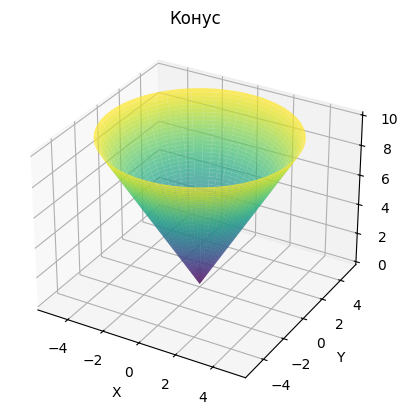

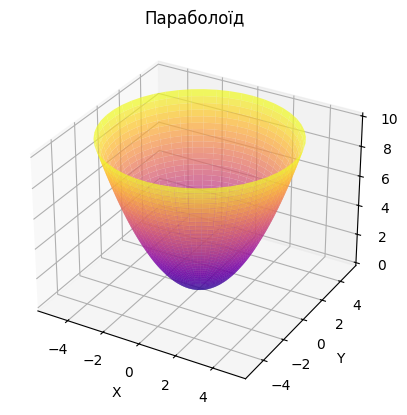

In [9]:
import numpy as np
import matplotlib.pyplot as plt

class Shape:
    """Базовий клас для геометричних фігур."""
    def __init__(self, name: str):
        self.name = name

    def get_volume(self) -> float:
        """Повертає об'єм фігури. Має бути перевизначений у нащадках."""
        print(f"Метод get_volume для класу {type(self).__name__} не визначений.")
        return 0.0

    def draw(self):
        """Малює фігуру. Має бути перевизначений у нащадках."""
        print(f"Метод draw для класу {type(self).__name__} не визначений.")

class Cone(Shape):
    """Клас, що описує конус."""
    def __init__(self, radius: float, height: float):
        super().__init__("Конус")
        self.radius = radius
        self.height = height

    def get_volume(self) -> float:
        """Обчислює об'єм конуса за формулою V = (1/3) * pi * r^2 * h."""
        return (1/3) * np.pi * (self.radius ** 2) * self.height

    def draw(self):
        """Малює 3D-модель конуса."""
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        # Створення сітки для конуса
        theta = np.linspace(0, 2 * np.pi, 50)
        r = np.linspace(0, self.radius, 50)
        theta_grid, r_grid = np.meshgrid(theta, r)

        # Рівняння конуса
        x = r_grid * np.cos(theta_grid)
        y = r_grid * np.sin(theta_grid)
        z = (r_grid / self.radius) * self.height

        ax.plot_surface(x, y, z, alpha=0.7, cmap='viridis')
        ax.set_title(self.name)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')

class Paraboloid(Shape):
    """Клас, що описує параболоїд."""
    def __init__(self, radius: float, height: float):
        super().__init__("Параболоїд")
        self.radius = radius
        self.height = height

    def get_volume(self) -> float:
        """Обчислює об'єм параболоїда за формулою V = (1/2) * pi * r^2 * h."""
        return 0.5 * np.pi * (self.radius ** 2) * self.height

    def draw(self):
        """Малює 3D-модель параболоїда."""
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        # Створення сітки для параболоїда
        u = np.linspace(0, self.radius, 50)
        v = np.linspace(0, 2 * np.pi, 50)
        u_grid, v_grid = np.meshgrid(u, v)

        # Рівняння параболоїда
        x = u_grid * np.cos(v_grid)
        y = u_grid * np.sin(v_grid)
        z = self.height * (u_grid / self.radius) ** 2

        ax.plot_surface(x, y, z, alpha=0.7, cmap='plasma')
        ax.set_title(self.name)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')


# Створення екземплярів
my_cone = Cone(radius=5, height=10)
my_paraboloid = Paraboloid(radius=5, height=10)

# Використання методів
print(f"Об'єм фігури '{my_cone.name}': {my_cone.get_volume():.2f}")
print(f"Об'єм фігури '{my_paraboloid.name}': {my_paraboloid.get_volume():.2f}")

# Малювання фігур (відкриються у нових вікнах)
print("Малюю фігури...")
my_cone.draw()
my_paraboloid.draw()

# Показуємо всі вікна з графіками
plt.show()